In [1]:
import pandas as pd
import gc
from tqdm import tqdm

In [2]:
comp = pd.read_csv('compustat.csv')
crsp = pd.read_csv('crsp.csv')

crsp.info()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8353217 entries, 0 to 8353216
Data columns (total 24 columns):
 #   Column     Dtype  
---  ------     -----  
 0   GVKEY      int64  
 1   LINKPRIM   object 
 2   LIID       int64  
 3   LINKTYPE   object 
 4   LPERMNO    int64  
 5   LPERMCO    int64  
 6   LINKDT     int64  
 7   LINKENDDT  object 
 8   iid        int64  
 9   datadate   int64  
 10  tic        object 
 11  cusip      object 
 12  conm       object 
 13  ajexdi     float64
 14  prccd      float64
 15  prchd      float64
 16  prcld      float64
 17  prcod      float64
 18  exchg      int64  
 19  tpci       object 
 20  cik        float64
 21  add1       object 
 22  weburl     object 
 23  ipodate    float64
dtypes: float64(7), int64(8), object(9)
memory usage: 1.5+ GB


In [3]:
# removing duplicate columns

for col in crsp:
    if col in ['LPERMNO', 'datadate']:
        continue
    elif col in comp.columns:
        del comp[col]

gc.collect()


14

<AxesSubplot:>

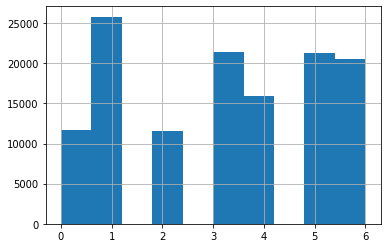

In [4]:
# looking at the distribution of weekdays for the compustat dataset
pd.to_datetime(comp['datadate'], format='%Y%m%d').dt.dayofweek.hist()


In [5]:
linked = crsp.join(comp.set_index(['LPERMNO', 'datadate']), on=['LPERMNO', 'datadate'])

In [6]:
linked.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8353233 entries, 0 to 8353216
Data columns (total 44 columns):
 #   Column     Dtype  
---  ------     -----  
 0   GVKEY      int64  
 1   LINKPRIM   object 
 2   LIID       int64  
 3   LINKTYPE   object 
 4   LPERMNO    int64  
 5   LPERMCO    int64  
 6   LINKDT     int64  
 7   LINKENDDT  object 
 8   iid        int64  
 9   datadate   int64  
 10  tic        object 
 11  cusip      object 
 12  conm       object 
 13  ajexdi     float64
 14  prccd      float64
 15  prchd      float64
 16  prcld      float64
 17  prcod      float64
 18  exchg      int64  
 19  tpci       object 
 20  cik        float64
 21  add1       object 
 22  weburl     object 
 23  ipodate    float64
 24  fyearq     float64
 25  fqtr       float64
 26  fyr        float64
 27  indfmt     object 
 28  consol     object 
 29  popsrc     object 
 30  datafmt    object 
 31  ajexq      float64
 32  ajpq       float64
 33  curcdq     object 
 34  datacqtr   object 

In [7]:
# the link is bad currently must figure out the date to link on for compustat
# ignoring for now as not currently important, want to see how the import will work with sparse data currently

In [8]:
data = crsp.set_index(['datadate', 'LPERMNO'])
static_cols = ['GVKEY', 'LINKPRIM', 'weburl', 'ipodate']
timeseries_cols = ['prccd']

id_list = linked['LPERMNO'].unique()[:500]

print('formatting')
for ticker in tqdm(id_list):  # will print progress bar
    # formatting the document data for a single asset at a time
    data_tick = data.xs(ticker, level=1)
    static_df = data_tick.iloc[0].to_frame().reindex([static_cols])

    ticker_dict = list(static_df.to_dict().values())[0]
    ticker_dict['cusip'] = ticker
    ticker_dict['timeseries'] = list(data_tick[timeseries_cols].reset_index().to_dict('index').values())
    #print(ticker_dict)

 78%|███████▊  | 392/500 [00:03<00:00, 114.23it/s]


formatting


KeyboardInterrupt: 

In [65]:
linked


,GVKEY,LINKPRIM,LIID,LINKTYPE,LPERMNO,LPERMCO,LINKDT,LINKENDDT,iid,datadate,...,datacqtr,datafqtr,pdateq,rdq,acoq,actq,dlcq,dlttq,gdwlamq,costat
0,1004,P,1,LU,54594,20000,19720424,E,1,20181121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1004,P,1,LU,54594,20000,19720424,E,1,20170331,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1004,P,1,LU,54594,20000,19720424,E,1,20190104,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1004,P,1,LU,54594,20000,19720424,E,1,20160404,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1004,P,1,LU,54594,20000,19720424,E,1,20161005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8353212,345980,P,1,LC,20333,57666,20201216,E,1,20201222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8353213,345980,P,1,LC,20333,57666,20201216,E,1,20201221,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8353214,345980,P,1,LC,20333,57666,20201216,E,1,20201218,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8353215,345980,P,1,LC,20333,57666,20201216,E,1,20201217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
